In [6]:
!sudo python3 -m pip install pandas

    100% |████████████████████████████████| 10.0MB 134kB/s eta 0:00:01
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import pandas as pd
import numpy as np

In [17]:
inputbucket="s3://6007.finalproject/sample_geo.txt"

In [70]:
data = sc.textFile(inputbucket)\
.flatMap(lambda x: x.split("\n"))\
.filter(lambda x: (x!="") and ("L" not in x) )\
.map(lambda x: x.split("\t"))\
.map(lambda x: (float(x[0]),float(x[1]),int(x[2])))

In [71]:
data.take(10)

[(37.77253945, -77.49954987, 1),
 (42.09013298, -87.68915558, 2),
 (39.56341754, -75.58753204, 3),
 (39.45302347, -87.69374084, 4),
 (38.9537989, -77.01656342, 5),
 (39.90031211, -75.74486542, 6),
 (36.24009843, -115.1586914, 7),
 (26.11330818, -80.09202576, 8),
 (34.27036086, -118.3162918, 9),
 (38.81664153, -97.62573242, 10)]

In [72]:
full_data = data.collect()

In [74]:
df = pd.DataFrame(full_data,columns=["Latitude",'Longitude','Index'])

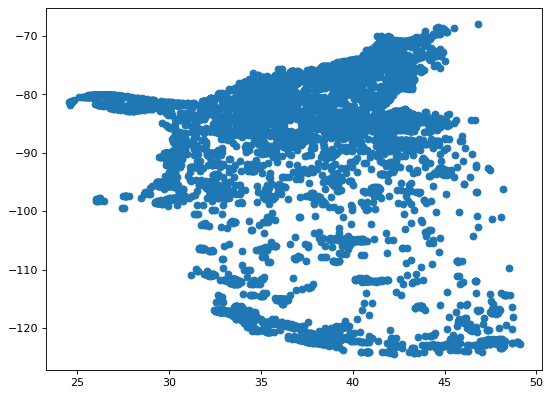

In [76]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df.Latitude,df.Longitude)